### Kaynaklar
* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pylab as pl
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense,Dropout, Activation, Flatten
from tensorflow.keras import layers,activations
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dir = "planes"

### DataAugmentation
### Kenar benzerlik (eşik belirleme)
### Köşe benzerlik

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [43]:
train_datagen = train_datagen.flow_from_directory(base_dir,target_size=(500,500),
                                                  subset="training",
                                                  batch_size=2)

test_datagen = test_datagen.flow_from_directory(base_dir,target_size=(500,500),
                                                subset="validation",
                                                batch_size=2)

Found 7575 images belonging to 6 classes.
Found 839 images belonging to 6 classes.


In [53]:
## Test yazarken işe yarıyor :)
print("class_indices : ",train_datagen.class_indices)
print("egitim veri sayısı : ",len(train_datagen.classes))
print("classes : ",train_datagen.classes)
print("egitim veri sayısı : ",train_datagen.samples)
# print("Veri dosya isimleri :",train_datagen.filenames) # ['drone/00000138.jpg', 'drone/00000139.jpg',..
print("interpolasyon türü : ",train_datagen.interpolation)
print("target size : ",train_datagen.target_size)
print("subset : ",train_datagen.subset)
print("Shuffle : ",train_datagen.shuffle)
print("Split oranı : ",train_datagen.split)
print("Transfer lea",train_datagen.sample_weight)

class_indices :  {'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
egitim veri sayısı :  7575
classes :  [0 0 0 ... 5 5 5]
egitim veri sayısı :  7575
interpolasyon türü :  nearest
target size :  (500, 500)
subset :  training
Shuffle :  True
Split oranı :  (0.1, 1)
Transfer lea None


In [46]:
classes_name = ["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

In [54]:
# test_datagen.next() # rastgele data getirir

index no : [0. 0. 0. 1. 0. 0.]
name : missile


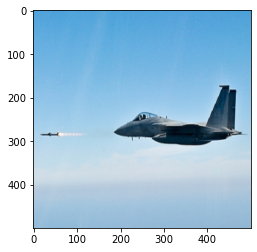

index no : [0. 0. 0. 0. 0. 1.]
name : rocket


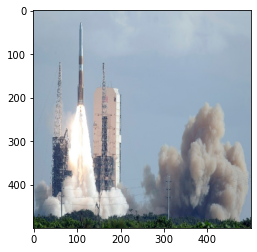

index no : [0. 0. 0. 0. 1. 0.]
name : passenger-plane


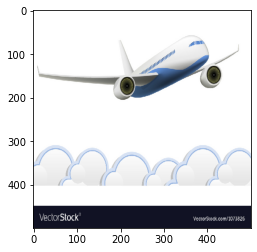

index no : [1. 0. 0. 0. 0. 0.]
name : drone


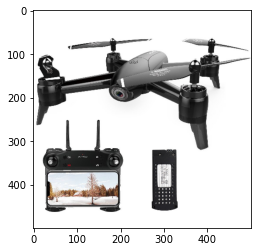

index no : [0. 0. 0. 1. 0. 0.]
name : missile


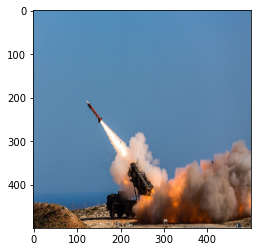

In [51]:
for _ in range(5):
    img,label = test_datagen.next() 
    plt.imshow(img[0])
    print("index no :",label[0])
    print("name :",classes_name[np.argmax(label[0])])
    plt.show()

### Sequential model : 
Tek input katmanı var. Kolay ama esnek değil.  
### Functional model : 
Birden fazla input alabilir. Biraz daha zor ama esnektir.


### tf.keras.layers.Conv2D(
* **filters**,       
(n,n) giriş için (n * n * 3 < filtre sayısı) tavsiye edilir. Görüntü karmaşıklığı ile doğru orantılıdır.
* **kernel_size**,
Evrişim matrisi, tuple (int,int) olarak tanımlanır. 
Tek sayı olmalıdır. 1x1,3x3,5x5,7x7 , genellikle 128x128 matris büyüklüğüne sahip görüntülerde 1x1 kullanılır. daha büyük giriş resimlerinde özellik öğrenmeyi genişletmek için 3x3 ve daha büyük kernel kullanılır.
* **strides=(1, 1)**,
adım kaydırma
* **padding='valid'**,
pading same ve valid parametresi alıyor. stride 1 ve padding same ise girdi boyutla çıktı boyut aynı oluyor.
* **data_format=None**,
* **dilation_rate=(1, 1)**,
* **groups=1**,
* **activation=None**,
aktivasyon fonksiyonları
* **use_bias=True**,
* **kernel_initializer='glorot_uniform'**,
* **bias_initializer='zeros'**,
* **kernel_regularizer=None**,
* **bias_regularizer=None**,
* **activity_regularizer=None**,
* **kernel_constraint=None**,
* **bias_constraint=None**,

#### Filters
![alt text](filters.png "Title")

#### fullyconnect
![alt text](fully_connected.png.webp "Title")

In [15]:
model = Sequential()

model.add(layer=Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape = (500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layer=Conv2D(filters=8,activation="elu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))
model.add(layer=Conv2D(filters=16,activation="elu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))
model.add(layer=Conv2D(filters=32,activation="elu",kernel_size=(5,5)))
model.add(layers.Flatten()) # düzleştirme

model.add(layers.Dense(50,activation="elu")) # 50 nöron gizli katman
model.add(layers.Dense(100,activation="elu")) # 100 nöron gizli katmanda
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(6,activation="softmax")) # sınıf sayısı kadar çıktı alıyoruz
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 248, 248, 4)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 244, 244, 8)       808       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 122, 122, 8)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 118, 118, 16)      3216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 59, 59, 16)      

In [16]:
tf.config.set_soft_device_placement(True)

optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

with tf.device("/gpu:0"):
    model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])
    result = model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5


2022-05-07 20:46:48.004724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3788/3788 [==============================] - ETA: 0s - loss: 1.6742 - mse: 0.1319 - accuracy: 0.3035

2022-05-07 20:51:22.882315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3788/3788 [==============================] - 290s 76ms/step - loss: 1.6742 - mse: 0.1319 - accuracy: 0.3035 - val_loss: 1.4835 - val_mse: 0.1204 - val_accuracy: 0.4184
Epoch 2/5
3788/3788 [==============================] - 298s 79ms/step - loss: 1.5409 - mse: 0.1232 - accuracy: 0.3979 - val_loss: 1.4688 - val_mse: 0.1183 - val_accuracy: 0.4243
Epoch 3/5
3788/3788 [==============================] - 296s 78ms/step - loss: 1.4258 - mse: 0.1150 - accuracy: 0.4525 - val_loss: 1.4224 - val_mse: 0.1153 - val_accuracy: 0.4386
Epoch 4/5
3788/3788 [==============================] - 293s 77ms/step - loss: 1.2820 - mse: 0.1042 - accuracy: 0.5348 - val_loss: 1.4523 - val_mse: 0.1161 - val_accuracy: 0.4160
Epoch 5/5
3788/3788 [==============================] - 296s 78ms/step - loss: 1.1214 - mse: 0.0919 - accuracy: 0.6017 - val_loss: 1.5018 - val_mse: 0.1193 - val_accuracy: 0.4064


In [18]:
model.history.history

{'loss': [1.6741985082626343,
  1.5409127473831177,
  1.4258378744125366,
  1.2820409536361694,
  1.1213674545288086],
 'mse': [0.13187368214130402,
  0.12315841019153595,
  0.11496807634830475,
  0.10424225777387619,
  0.09187508374452591],
 'accuracy': [0.30349835753440857,
  0.39788779616355896,
  0.4525412619113922,
  0.5347854495048523,
  0.601716160774231],
 'val_loss': [1.4834883213043213,
  1.4688215255737305,
  1.422369360923767,
  1.4522660970687866,
  1.5018457174301147],
 'val_mse': [0.12044113874435425,
  0.11832490563392639,
  0.11531002074480057,
  0.11607006192207336,
  0.11933563649654388],
 'val_accuracy': [0.41835519671440125,
  0.4243146479129791,
  0.43861740827560425,
  0.41597139835357666,
  0.4064362347126007]}

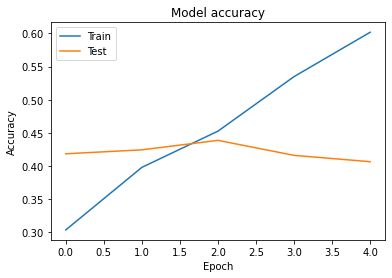

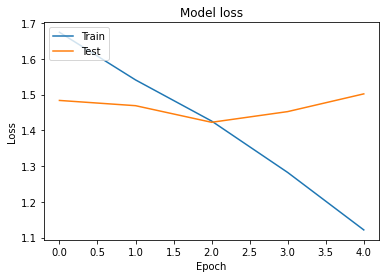

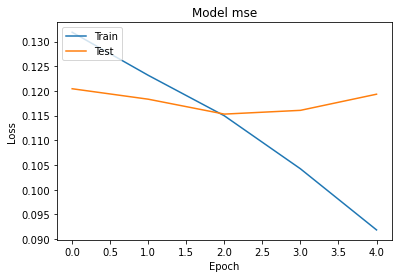

NameError: name 'test_data' is not defined

In [22]:
#plot accuracy vs epoch
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(model.history.history['mse'])
plt.plot(model.history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])